### SVR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [4]:
X,y

(array([[ 0.62329187, -0.31032929],
        [-0.64601882,  0.48237403],
        [-0.72316801,  1.13700124],
        ...,
        [-0.30922221, -0.75311137],
        [-0.51412284, -0.77778854],
        [ 0.45727914, -1.59759664]]),
 array([ 2.10034896e+01, -1.93000303e+01, -3.35632144e+00, -1.12531307e+01,
         5.36111257e+00, -3.24618702e+01,  7.56914761e+00,  1.92448823e+01,
        -5.96257090e+01,  3.53980460e+01, -5.65423055e+01, -1.00258092e+02,
        -6.92128837e+01,  3.47279017e+00,  2.16910613e+01,  1.94158648e-01,
        -3.46770459e+01,  2.13252278e+01, -1.00619876e+01, -4.34496067e+01,
         2.06885712e+01,  5.29152532e+01,  4.70145159e+01, -3.91108890e+01,
         2.13652664e+00,  1.68991155e+01, -3.07451079e+01,  4.53659906e+01,
         6.22491239e+01, -1.14220371e+01, -8.15118405e+01, -5.92290220e+01,
        -1.91898009e+01,  4.87957049e+01, -8.85599079e+01, -2.28640710e+01,
        -8.46450984e+01,  5.36382197e+01,  4.76984190e+01, -1.29547819e+02,
         

<AxesSubplot: xlabel='0', ylabel='1'>

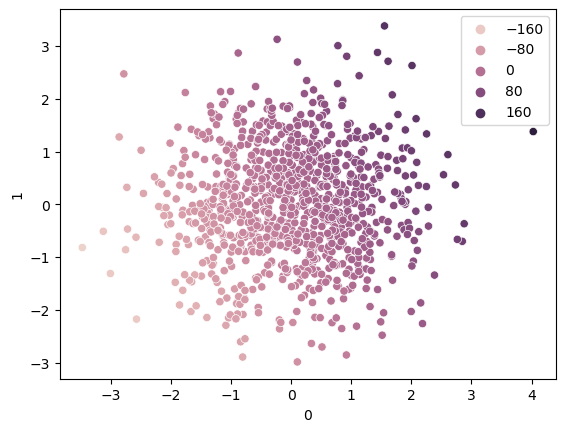

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
from sklearn.svm import SVR

In [9]:
svr=SVR(kernel='linear')

In [10]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [11]:
svr.coef_

array([[44.39876267, 22.52588612]])

In [12]:
y_predict=svr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score


In [14]:
score=r2_score(y_test,y_predict)

In [15]:
score

0.9965342630633413

### Hyper parameter Tunning

In [24]:
parameter={
    'C': [0.1,1,10,100,1000],
     'gamma' :[1,0.1,0.01,0.001,0.0001],
    'epsilon' :[0.1,0.2,0.3]
}

In [25]:
svR=SVR()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
searchcv=GridSearchCV(svR,param_grid=parameter,cv=5,refit=True)

In [28]:
searchcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [29]:
y_predicts=searchcv.predict(X_test)

In [32]:
searchcv.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 0.001}

In [30]:
score=r2_score(y_test,y_predicts)

In [31]:
score

0.9965345510997382